In [58]:
import notebook_util
import cv2
from matplotlib import pyplot as plt
import numpy as np
notebook_util.override_imshow(cv2)

%matplotlib inline

Showing Image: Original Image


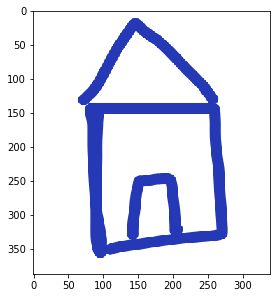

In [59]:
image_data = cv2.imread('resources/house.png')
work_image = image_data.copy()
cv2.imshow('Original Image', work_image)

In [60]:
# Grayscale and binarize
gray = cv2.cvtColor(image_data, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
#cv2.imshow("",thresh)

Showing Image: Bounding Rectangle 0


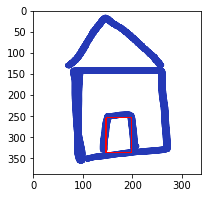

Showing Image: Bounding Rectangle 1


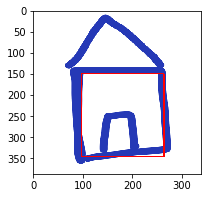

Showing Image: Bounding Rectangle 2


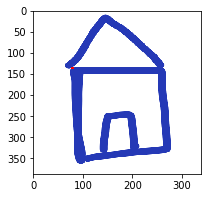

Showing Image: Bounding Rectangle 3


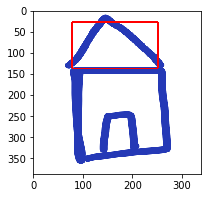

Showing Image: Bounding Rectangle 4


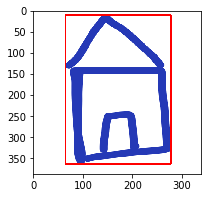

In [61]:
# Find contours 
_, contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Iterate through each contour and compute the bounding rectangle
for i, c in enumerate(contours):
    work_image = image_data.copy()
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(work_image,(x,y),(x+w,y+h),(0,0,255),2)    
    cv2.imshow('Bounding Rectangle {}'.format(i), work_image, (3,3))

Showing Image: Approx Poly DP


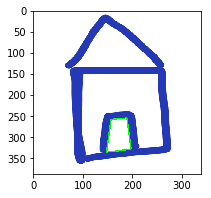

Showing Image: Approx Poly DP


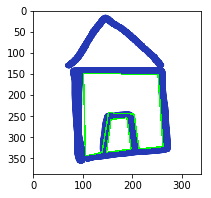

Showing Image: Approx Poly DP


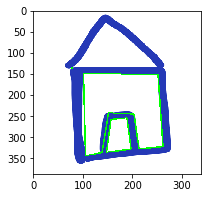

Showing Image: Approx Poly DP


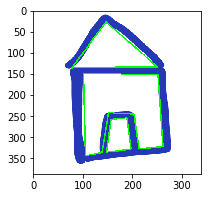

Showing Image: Approx Poly DP


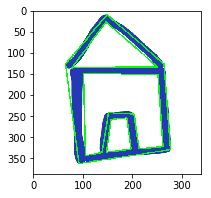

In [62]:
work_image = image_data.copy()

# Iterate through each contour and compute the approx contour
for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(work_image, [approx], 0, (0, 255, 0), 2)
    cv2.imshow('Approx Poly DP', work_image, (3,3))